# Exercise: Exploring and Predicting Titanic Survivorship

Introduction:
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. In this exercise, you'll explore the Titanic dataset, select relevant features, and create a basic predictor to determine the chances of survival for the passengers.

Objective:
To understand the factors that influenced survivorship on the Titanic and build a basic predictive model based on the dataset.

## Data Exploration:

   Load the Titanic dataset.
   
   Understand the structure, columns, and initial statistics.
   
   Visualize the distribution of key variables like age, fare, and passenger class.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
file_path = 'C:\\Users\\jriquel1\\Desktop\\module 2 assigment\\Assigment Titanic\\titanic.csv'
titanic_df = pd.read_csv(file_path)

In [25]:
# Adding the 'FamilySize' column to the Titanic dataset
titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1

# Displaying the first few rows to confirm the addition of the 'FamilySize' column
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0


# Overview of the first few rows of the Titanic dataset:

pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived: Survival (0 = No; 1 = Yes)

name: Name of the passenger
    
sex: Sex of the passenger (it seems to be encoded: 1 for female and 0 for male)
    
age: Age of the passenger
    
sibsp: Number of siblings/spouses aboard
    
parch: Number of parents/children aboard
    
ticket: Ticket number
    
fare: Passenger fare
    
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
    
Embarked_C, Embarked_Q, Embarked_S: One-hot encoded columns for the embarked feature
    
FamilySize: Represents the total number of family members aboard (sum of sibsp and parch + 1 for the individual)
    

In [13]:
# Displaying basic statistics for the Titanic dataset

titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


##### The dataset has a mixture of numerical and categorical variables. Here are some insights from the basic statistics:

 Survival: About 38% of the passengers in the dataset survived the Titanic disaster.
  
 Passenger Class: The mean passenger class is approximately 2.29, suggesting that there were more passengers in the 2nd and 3rd classes than in the 1st class.
  
 Age: The average age of passengers was around 29.88 years, with the youngest being about 0.17 years (approximately 2 months) and the oldest being 80 years.
    
 Siblings/Spouses & Parents/Children: Most passengers did not have siblings, spouses, parents, or children aboard.
  
 Fare: The average fare was approximately 33.30 units. Fares varied widely, with some passengers paying nothing and others paying as much as 512.33 units.
    
 Cabin & Embarked: There are several missing values in the 'cabin' and 'embarked' columns.
    
 Boat & Body: These columns seem to be related to the survival outcome. 'Boat' has entries for passengers who survived, while 'body' has entries for those who did not but whose bodies were recovered.

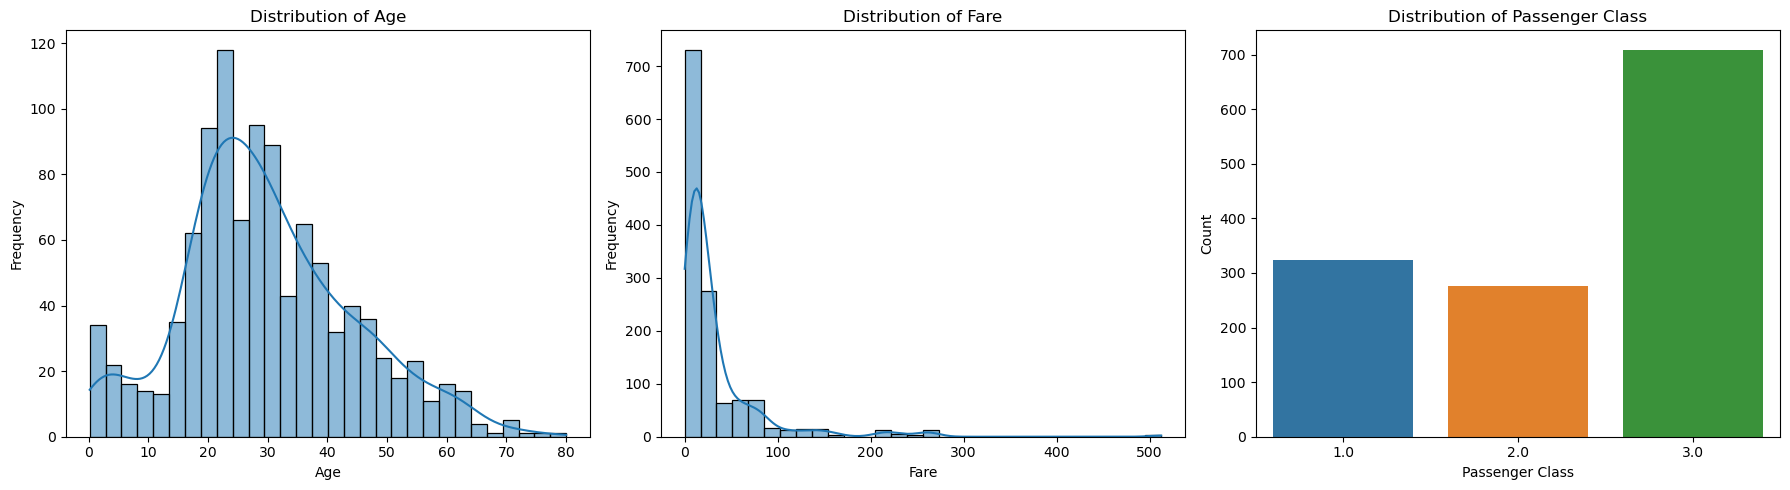

In [20]:
#Visualize Key Variables:

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting distribution of Age
sns.histplot(titanic_df['age'], ax=ax[0], kde=True, bins=30)
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Plotting distribution of Fare
sns.histplot(titanic_df['fare'], ax=ax[1], kde=True, bins=30)
ax[1].set_title('Distribution of Fare')
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('Frequency')

# Plotting distribution of Passenger Class
sns.countplot(data=titanic_df, x='pclass', ax=ax[2])
ax[2].set_title('Distribution of Passenger Class')
ax[2].set_xlabel('Passenger Class')
ax[2].set_ylabel('Count')

# Displaying the plots
plt.tight_layout()
plt.show()


Distributions of key variables:

1.-  Distribution of Age:
  
   The age distribution is slightly right-skewed.
        
   Most passengers were in their 20s and 30s, but there's a wide range of ages onboard, from infants to elderly passengers.
        
2.- Distribution of Fare:
 
   The fare distribution is highly right-skewed.
   
   Most passengers paid low fares, but there are a few passengers who paid significantly higher fares. This could be due to some premium cabins or suites on the Titanic.
   
3.- Distribution of Passenger Class:
 
   A majority of the passengers were in the 3rd class.
        
   1st and 2nd classes had relatively fewer passengers.
   
These visualizations provide insights into the socio-economic distribution of passengers on the Titanic and can be crucial in understanding the factors influencing survival.

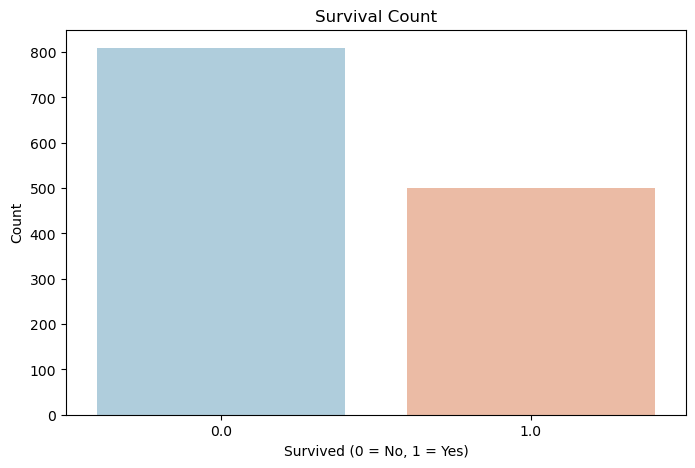

In [15]:
# Visualizing the survival rate
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', data=titanic_df, palette='RdBu_r')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


##### More passengers did not survive (represented by 0) than those who survived (represented by 1).This visualization gives a clear picture of the tragic outcome of the Titanic disaster, where a significant number of passengers lost their lives.

# Step 2: Feature Selection

In this step, I'll analyze the impact of various features on survivorship to determine which ones are relevant and should be included in our predictive model.

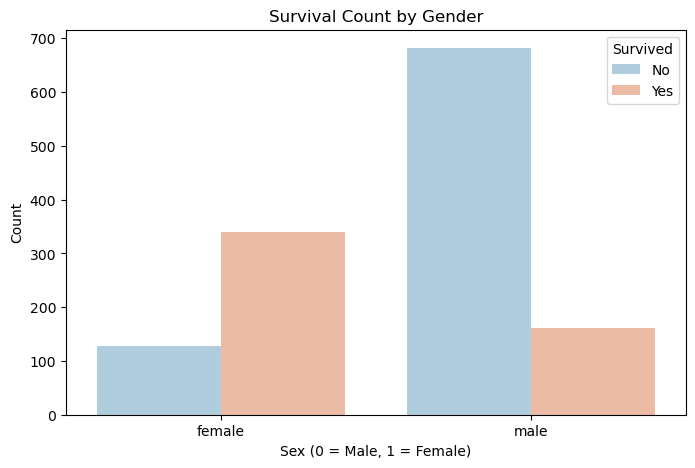

In [17]:
#Feature Selection:

# Visualizing the survival rate based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=titanic_df, palette='RdBu_r')
plt.title('Survival Count by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


These visualization corroborates the often-cited observation that females had a higher survival rate on the Titanic due to prioritization during evacuation. 

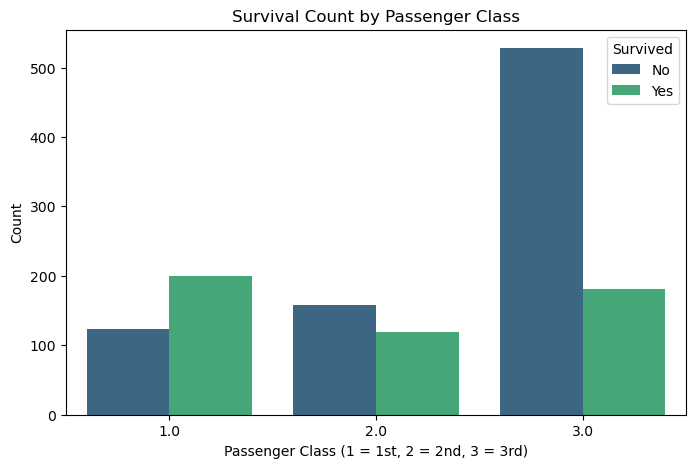

In [18]:
# Visualizing the survival rate based on passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=titanic_df, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


This visualization suggests that 1st class passengers had a better survival rate compared to the other classes. 

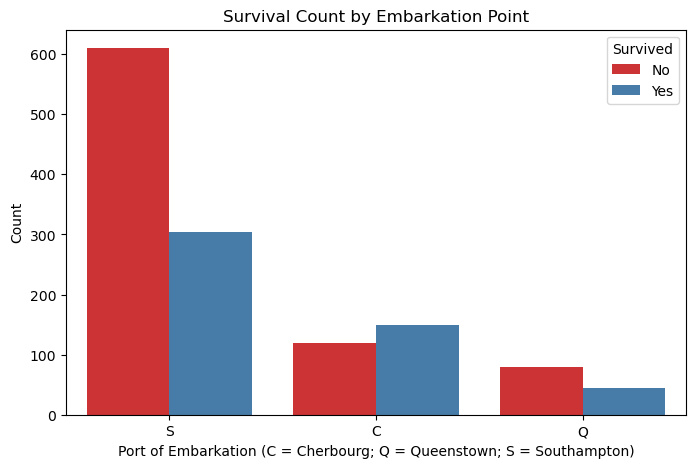

In [19]:
# Visualizing the survival rate based on the port of embarkation
plt.figure(figsize=(8, 5))
sns.countplot(x='embarked', hue='survived', data=titanic_df, palette='Set1')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


The higher survival rate for passengers from Cherbourg might indicate a larger proportion of 1st or 2nd class passengers or other factors that improved their chances of survival.

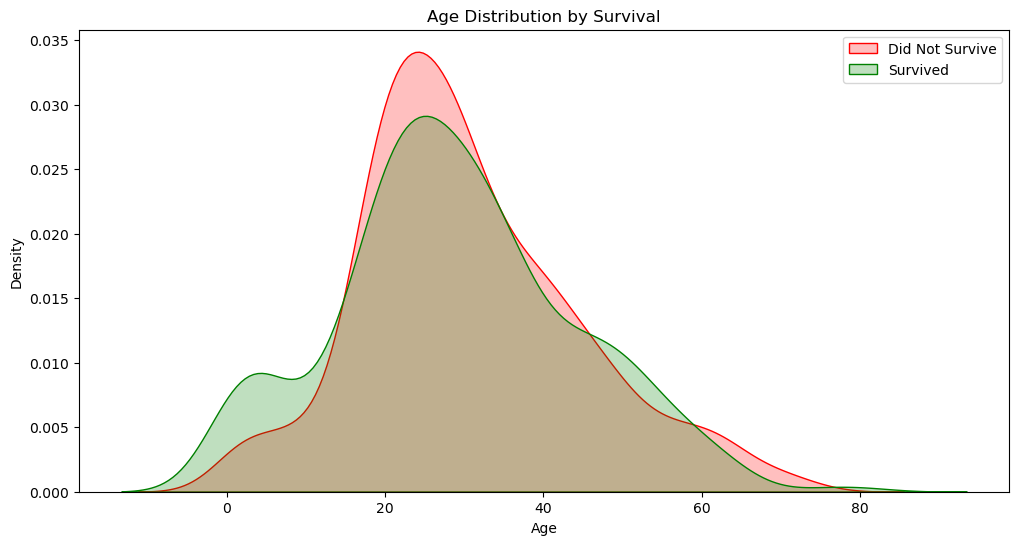

In [27]:
# Updated visualization: Age distribution of survivors and non-survivors using the 'fill' parameter
plt.figure(figsize=(12, 6))
sns.kdeplot(titanic_df[titanic_df['survived'] == 0]['age'], label='Did Not Survive', fill=True, color='r')
sns.kdeplot(titanic_df[titanic_df['survived'] == 1]['age'], label='Survived', fill=True, color='g')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


The green distribution (representing survivors) has a noticeable peak for younger ages, indicating that children had a relatively higher survival rate. Conversely, the majority of young adults did not survive, as evidenced by the peak in the red distribution.

# Step 3: Data Cleaning

Before we can build a predictive model, we need to ensure that our data is clean and in the right format. This involves:

Handling missing values.


Encoding categorical variables.

Splitting the data into training and testing sets.

In [28]:
# Checking for missing values in the Titanic dataset
missing_values = titanic_df.isnull().sum()
missing_values[missing_values > 0]


pclass           1
survived         1
name             1
sex              1
age            264
sibsp            1
parch            1
ticket           1
fare             2
cabin         1015
embarked         3
boat           824
body          1189
home.dest      565
FamilySize       1
dtype: int64

# Given the extent of missing values, here's a suggested plan:

For age and fare, we can impute the missing values with the median of the respective columns.

cabin, boat, and body have a significant number of missing values. For the purpose of our basic predictor, we might consider dropping these columns.

For embarked, we can fill missing values with the mode (most frequent value).

home.dest can be dropped or filled with a placeholder value like "Unknown".
    
We should further investigate the row(s) that have multiple missing values to decide if they should be removed.

In [30]:
# 1. Impute missing values for 'age' and 'fare' with their medians
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['fare'].fillna(titanic_df['fare'].median(), inplace=True)

# 2. Drop the columns 'cabin', 'boat', and 'body'
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)

# 3. Fill missing values in 'embarked' with the mode
most_common_embarked = titanic_df['embarked'].mode()[0]
titanic_df['embarked'].fillna(most_common_embarked, inplace=True)

# 4. Drop the 'home.dest' column
titanic_df.drop('home.dest', axis=1, inplace=True)

# Checking for remaining missing values
remaining_missing_values = titanic_df.isnull().sum()
remaining_missing_values[remaining_missing_values > 0]


pclass        1
survived      1
name          1
sex           1
sibsp         1
parch         1
ticket        1
FamilySize    1
dtype: int64

There is a row with multiple missing values across several columns (pclass, survived, name, sex, sibsp, parch, ticket, and FamilySize). This likely indicates a problematic row that should be investigated and potentially removed.

In [31]:
# Displaying the row(s) with missing values in the 'pclass' column
problematic_row = titanic_df[titanic_df['pclass'].isnull()]
problematic_row


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize
1309,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,14.4542,S,NaN


In [32]:
# Removing the problematic row with index 1309
titanic_df.drop(index=1309, inplace=True)

# Checking for any remaining missing values in the dataset
remaining_missing_values_after_removal = titanic_df.isnull().sum()
remaining_missing_values_after_removal[remaining_missing_values_after_removal > 0]

Series([], dtype: int64)

##### With the data now cleaned, I can proceed to the next step: encoding categorical variables and splitting the data into training and testing sets.

In [33]:
#Encoding Categorical Variables

# One-hot encoding the 'embarked' column
embarked_dummies = pd.get_dummies(titanic_df['embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)
titanic_df.drop('embarked', axis=1, inplace=True)

# Label encoding the 'sex' column (male: 0, female: 1)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})

# Displaying the first few rows to verify the encodings
titanic_df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,1.0,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,4.0,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,4.0,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,4.0,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,4.0,0,0,1


##### I'll split the data into a training set (to train the model) and a testing set (to evaluate the model's performance). A common practice is to allocate around 70-80% of the data for training and the remainder for testing.

In [34]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['survived']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1047, 10), (262, 10), (1047,), (262,))

With our data prepared, I can proceed to the modeling stage where we'll train a basic predictor and evaluate its performance. Noting that Decision Trees and Random Forests can sometimes overfit, especially on smaller datasets like the Titanic. I'll perform Logistic Regression, which is a simple yet powerful. 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initializing and training the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = log_reg_model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)


Accuracy: 0.7748091603053435

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       144
         1.0       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262



# Here's a brief interpretation:

The overall accuracy of the model is approximately 77.48%77.48%.

The model has a precision of 0.820.82 for predicting survivors, meaning when it predicts someone survived, it's correct 82%82% of the time.

The recall for survivors is 0.640.64, indicating that the model identifies 64%64% of all the actual survivors.

Given that this is a basic model with limited feature engineering, these results provide a good starting point. There's potential for improvement with more advanced models, feature engineering, and parameter tuning. However, for an introductory exploration into the Titanic dataset, this offers a solid foundation.